<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_10_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%94%8C%EB%A1%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.10. 여러가지 시각화 플롯

---

* 날짜:
* 이름:


# 등치지도

In [ ]:
import folium

In [ ]:
m = folium.Map([37.566,126.9780],zoom_start=13,tiles = 'Stamen Toner'
               )
m


# 워드클라우드

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns 
import numpy as np

In [ ]:
df = sns.load_dataset('mpg')
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [ ]:
text = [temp.split()[0] for temp in df['name']]
text[:5]

['chevrolet', 'buick', 'plymouth', 'amc', 'ford']

In [ ]:
text =" ".join(text)
text[:50]

'chevrolet buick plymouth amc ford ford chevrolet p'

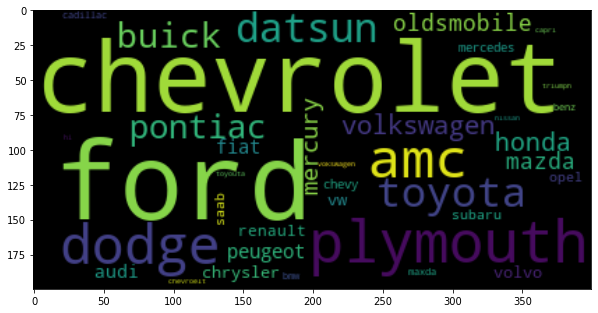

In [ ]:
word_cloud = WordCloud(collocations=False,
                       background_color='black').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud, interpolation='bilinear') 
plt.show()

# 도넛차트

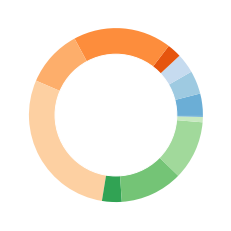

In [ ]:
cmap = plt.get_cmap('tab20c')
outer_colors=cmap(np.array([1,2,3,4,5,6,7,8,9,10,11]))
donut=[12,13,11,8,55,32,87,11,35,33,3,1]
plt.pie(donut, radius=1.0, colors = outer_colors)

incir = plt.Circle((0,0),0.7,color ='white')
p=plt.gcf()
p.gca().add_artist(incir)
plt.show()

# 박스플롯

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size']=15

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


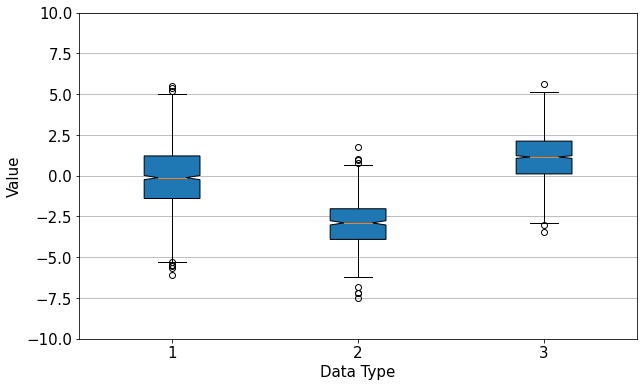

In [ ]:
np.random.seed(0)
data_a = np.random.normal(0,2.0,1000)  # 정규분포
data_b = np.random.normal(-3.0,1.5,500)
data_c = np.random.normal(1.2,1.5,1500)

fig, ax = plt.subplots()

bp = ax.boxplot([data_a, data_b, data_c],
                notch=True,
                patch_artist=True,
                )

ax.set_ylim(-10.0,10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.grid(color = 'grey', linestyle='-',
         linewidth=0.5, axis='y')
plt.show()

# 트리맵

In [ ]:
!pip install squarify

In [ ]:
import squarify as s

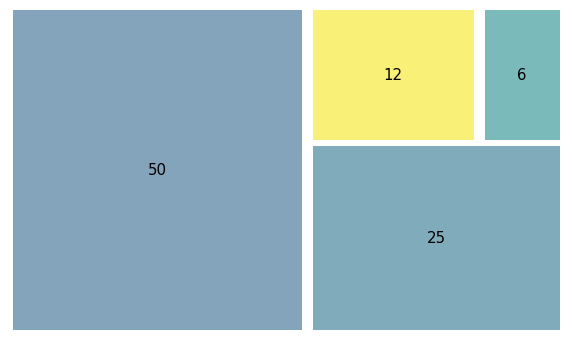

In [ ]:
sizes = [50, 25, 12, 6]
label = [sizes[i] for i in range(len(sizes))]

s.plot(sizes, # 데이터
       label = label, # 데이터 라벨
       alpha = 0.6, # 투명도
       pad = True # 그래프 사이의 간격
       )
plt.axis('off')
plt.show()

# 네트워크 다이어그램

Text(0.5, 1.0, 'Directed Network Diagram Sample')

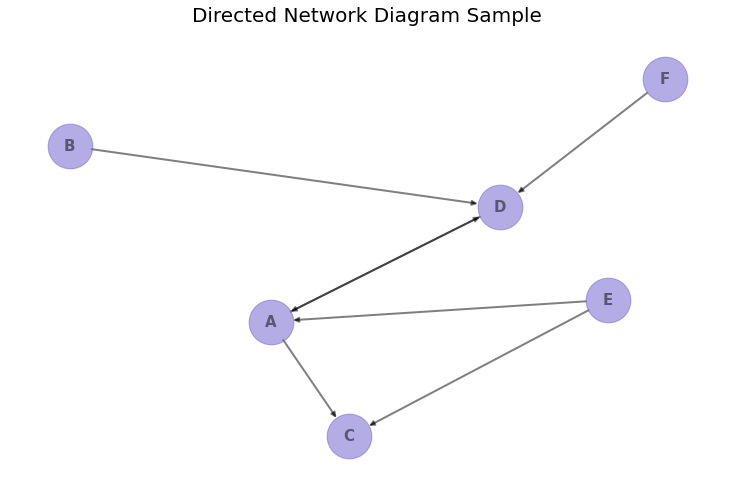

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.DataFrame({'from':['D','A','B','E','A','E','F'],
                   'to' : ['A','D','D','C','C','A','D']})
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using = nx.DiGraph())

nx.draw(G,
        with_labels = True,
        node_size = 2000,
        node_color = 'slateblue',
        alpha =0.5,
        width=2,
        font_size=15,
        font_weight='bold')
plt.title('Directed Network Diagram Sample', size = 20, pad=20)

# 3차원 산점도

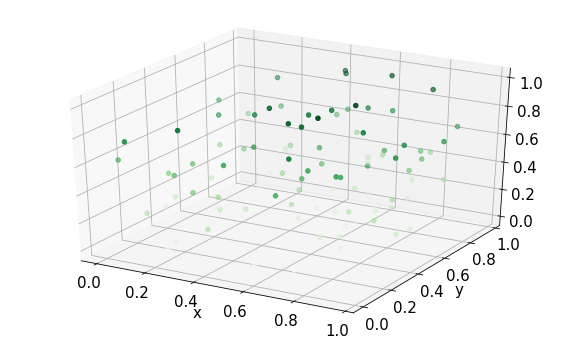

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

xdata=np.random.rand(100)
ydata=np.random.rand(100)
zdata=np.random.rand(100)

ax = plt.axes(projection = '3d')
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 버블맵

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

import plotly.express as px

#plt.figure(figsize=(6,4))
px.scatter_mapbox(df, lat='latitude', lon='longitude', 
                  size = 'population',
                  size_max=50, # 크기 최대값
                  mapbox_style="carto-positron", # 스타일
                  ) 

# 생키 다이어그램

In [ ]:
import plotly.graph_objects as go

source = [0,0,  # 데이터가 가는 방향을 정해준다.
          1,1,  # 1->>3,  1->>2,  2->>5,  2->>6
          2,2]
target = [1,2, 
          3,4,
          5,6]
value = [8.4, 3.0, 
         5.2, 3.2,
         2.5, 0.5]

label = ['America App store', 
         'iPhone', 'iPad', 
         'Phone game', 'Phone apps', 
         'Pad games', 'Pad apps']

link = dict(source = source,
            target = target,
            value = value,
            )
node = dict(label = label)
data = go.Sankey(link=link, node=node)
go.Figure(data)